<a href="https://colab.research.google.com/github/Tushar-spec994/Real_estate_house_price_prediction/blob/main/Real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd

Dataset Link:- https://www.kaggle.com/vikrishnan/boston-house-prices/version/1?select=housing.csv

In [51]:
housing=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/housing.csv')
housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [52]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

##Train Test Splitting##

In [54]:
import numpy as np
#for learning how the train and test data are splitted
def split_train_test(data,test_ratio):
  np.random.seed(42)
  shuffled=np.random.permutation(len(data))
  test_set_size=int(len(data)*test_ratio)
  test_indices=shuffled[:test_set_size]
  train_indices=shuffled[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

In [55]:
#train_indices,test_indices=split_train_test(housing,0.2)
#train_indices.head()

In [56]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
train_set

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4


In [57]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['chas']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]


In [58]:
strat_train_set

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


##Looking for correlations##

In [59]:
corr_matrix=housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

In [60]:
from pandas.plotting import scatter_matrix
att=["medv","rm","zn","lstat"]
#scatter_matrix(housing[att],figsize=(12,8))

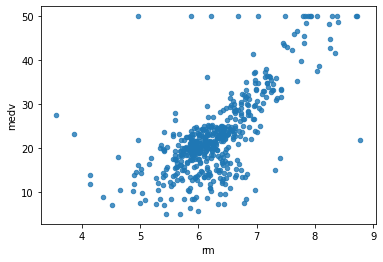

In [61]:
housing.plot(kind="scatter",x="rm",y="medv",alpha=0.8)

In [62]:
corr_matrix=housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

##Trying out attribute combination

In [63]:
housing['taxrm']=housing['tax']/housing['rm']
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,taxrm
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


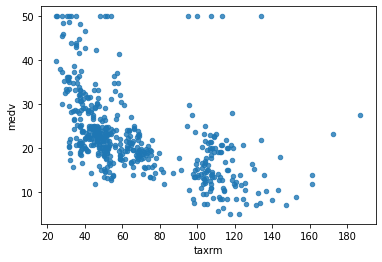

In [64]:
housing.plot(kind="scatter",x="taxrm",y="medv",alpha=0.8)

In [65]:
housing=strat_train_set.drop("medv",axis=1)
housing_labels=strat_train_set['medv'].copy()

##Creating pipeline

In [66]:
from sklearn.impute import SimpleImputer

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
                       ('imputer',SimpleImputer(strategy="median")),
                       ('std_scaler',StandardScaler()), 
])

In [68]:
housing_num_tr=my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

##selecting a desired model##

In [69]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [70]:
some_data=housing.iloc[:5]
some_label=housing_labels.iloc[0:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.396, 25.856, 16.295, 23.27 , 23.616])

In [71]:
some_label

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: medv, dtype: float64

##Evaluating the model

In [72]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)


In [73]:
rmse

1.1939978056516638

###Using better evaluation technique- Cross validation techniques

In [74]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [75]:
rmse_scores

array([2.83712846, 2.72505251, 4.43085849, 2.72665447, 3.48117109,
       2.42953559, 4.40810146, 3.34540342, 3.05269313, 3.05999241])

In [76]:
def print_scores(scores):
  print("Scores:",scores)
  print("Mean:",scores.mean())
  print("Standard deviation:",scores.std())

print_scores(rmse_scores)


Scores: [2.83712846 2.72505251 4.43085849 2.72665447 3.48117109 2.42953559
 4.40810146 3.34540342 3.05269313 3.05999241]
Mean: 3.24965910396021
Standard deviation: 0.6531680134392898


##Saving the model

In [77]:
import pickle
path="/content/drive/MyDrive/Colab_Notebooks/"
pickle_out= open(path+"Real_estate",'wb')
pickle.dump(model,pickle_out)

##Testing the model

In [78]:
x_test=strat_test_set.drop(['medv'],axis=1)
y_test=strat_test_set['medv'].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_prediction=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)

In [79]:
final_rmse

2.998349565618902

In [80]:
model.score(x_test_prepared,y_test)

0.8729165441018022